# Estimación de $\mu$ para Dijet

## earch for high mass dijet resonances with a new background prediction method in proton-proton collisions at $\sqrt{s} = $ 13 TeV

HEPData: https://www.hepdata.net/record/ins1764471

In [1]:
import pyhf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil
import json

In [2]:
#Lectura y almacenamiento de los datos de la figura
eventYield = pd.read_csv("./Differential_dijet_spectrum_.csv", skiprows= list(np.arange(0,7, 1)) + list(np.arange(51, 94, 1)))
crossSection = pd.read_csv("./Differential_dijet_spectrum_.csv", skiprows= list(np.arange(0, 52, 1)))

In [3]:
#Definimos background, signal y data
Data = eventYield["Event yield"]
bkg = Data
signal = np.random.randint(100,1000, 42)


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [8]:
df = pd.DataFrame({"DJ_bkg": bkg, "DJ_errbkg": 0.2*np.ones_like(Data), "DJ_data" : Data, "DJ_signal" : signal})
df.to_csv("DJData.csv", index = False)

In [4]:
#Creamos el modelo
model = pyhf.simplemodels.uncorrelated_background(signal = list(signal), bkg = list(bkg), bkg_uncertainty = list(0.2*np.ones_like(Data)))

In [5]:
#Calculamos el mu observado y esperado
observations = np.concatenate((Data, model.config.auxdata))
poi_values = np.linspace(0.1, 2, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.6f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.6f}")

Upper limit (obs): μ = 1.028673
Upper limit (exp): μ = 1.028673


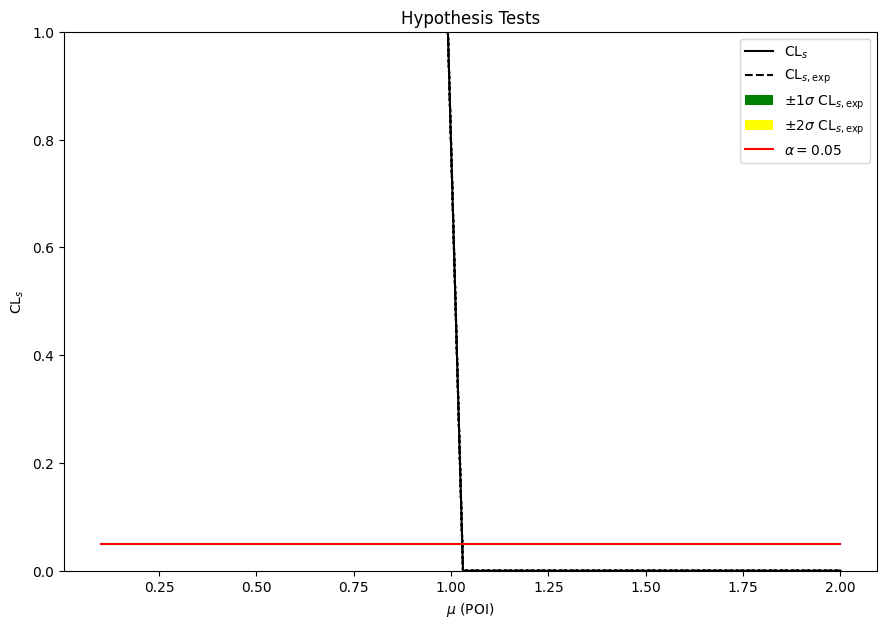

In [6]:
#Grafica de bandera
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)